In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_rows', 200)  # Отображение всех строк
pd.set_option('display.max_columns', None)  # Отображение всех столбцов
pd.set_option('display.max_colwidth', None)  # Show full column width


# %matplotlib widget



In [14]:
def split_into_chunks(array, chunk_size):
    return [array[i:i + chunk_size] for i in range(0, len(array), chunk_size)]


In [15]:
df = pd.read_csv('data.csv')

df


,death_date,name,call,birth_date,birth_city,citizenship,unit,notes,source,grave,memory_board,Unnamed: 11,Unnamed: 12
0,??/??/23,Абакумов Борис Михайлович,NaN,NaN,Патрушево Тюменская обл.,РФ,NaN,похоронен 20/04/23 в Патрушево,https://archive.is/CZlqX,NaN,NaN,-,NaN
1,22/07/22,Абагалдаев Ардан Алдарович,NaN,29/09/96,Дутулур Бурятия,РФ,"ОМОН Кречет Росгвардия, старший сержант полиции",NaN,https://archive.ph/LXAxG,NaN,NaN,NaN,NaN
2,09/05/22,Абаев Альберт Фидарович,NaN,06/06/01,Владикавказ,РФ,"ВС РФ, наводчик расчета БМ","Питомник Харьковская обл., снаряд в блиндаж, похоронен 22/05/22 на Аллее Героев Восточного кладбища Владикавказа",https://archive.ph/OIwxc,NaN,NaN,-,NaN
3,09/03/22,Абаев Давид Олегович,NaN,18/12/99,Ольгинское РСО,РФ,"21 ОМСБр ВС РФ 1 МСБ 3 МСР 1 взвод, комвзвода, лейтенант","Русанов Киевская обл., похоронен на Аллее Героев Восточного кладбища Владикавказа",https://archive.is/id7lb,NaN,NaN,NaN,NaN
4,16/03/17,Абазов Георгий Фидусович,NaN,09/05/84,Кочубеевское Ставропольский край,РФ,"ЧВК Вагнера 1 РШР, командир взвода огневой поддержки, м-0356","Красногорск, умер от ран, полученных в Сирии в период с 14/03/17 по 22/03/17",https://myrotvorets.center/criminal/abazov-georgij-fedusovich/\r\nhttps://archive.is/N0tm4,+,NaN,участие в БД на Донбассе требует подтверждения,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,10/07/14,Ященко Василий Васильевич,NaN,14/01/66,Пришиб,Украина,NaN,Луганск,https://archive.is/8ZreR,NaN,NaN,NaN,NaN
16829,03/07/17,Ященко Владимир Сергеевич,Яша,20/09/81,Иванополье Константиновский р-н,Украина,"ГРУ Т1 2 ООСпН, разведчик-гранатометчик",NaN,https://myrotvorets.center/criminal/yashhenko-vladimir-sergeevich/\r\nhttps://archive.is/POCrV,NaN,NaN,NaN,NaN
16830,08/10/16,Ященко Николай Николаевич,Ящер,NaN,NaN,NaN,"9 ОМСП, связист","Ленинское, попали в засаду укрДРГ",https://donetsksite.files.wordpress.com/2016/11/dehg6oo8.jpg,NaN,NaN,NaN,NaN
16831,30/08/14,Ященко Сергей Викторович,Кашкет,31/08/86,Зачатьевка,Украина,Керчь рота Щит,"Старобешево, вместе с ""Гарик"" с пулеметом выскочили прямо на «укроповскую» БМП. Их расстреляли в упор",https://archive.is/Qoi7x,NaN,NaN,NaN,NaN


In [16]:
df1 = pd.DataFrame()

df1['country'] = df['citizenship'].unique()

df1['calls'] = ''
df1['full_count'] = ''

for i, country in enumerate(df1['country']):
    calls_count = len(df[(df['citizenship'] == country) & (df['call'].notnull())])
    full_count = len(df[df['citizenship'] == country])


    if calls_count == 0:
        calls = 0
    else:
        calls = full_count / calls_count

    df1['full_count'][i] = full_count
    df1['calls'][i] = calls




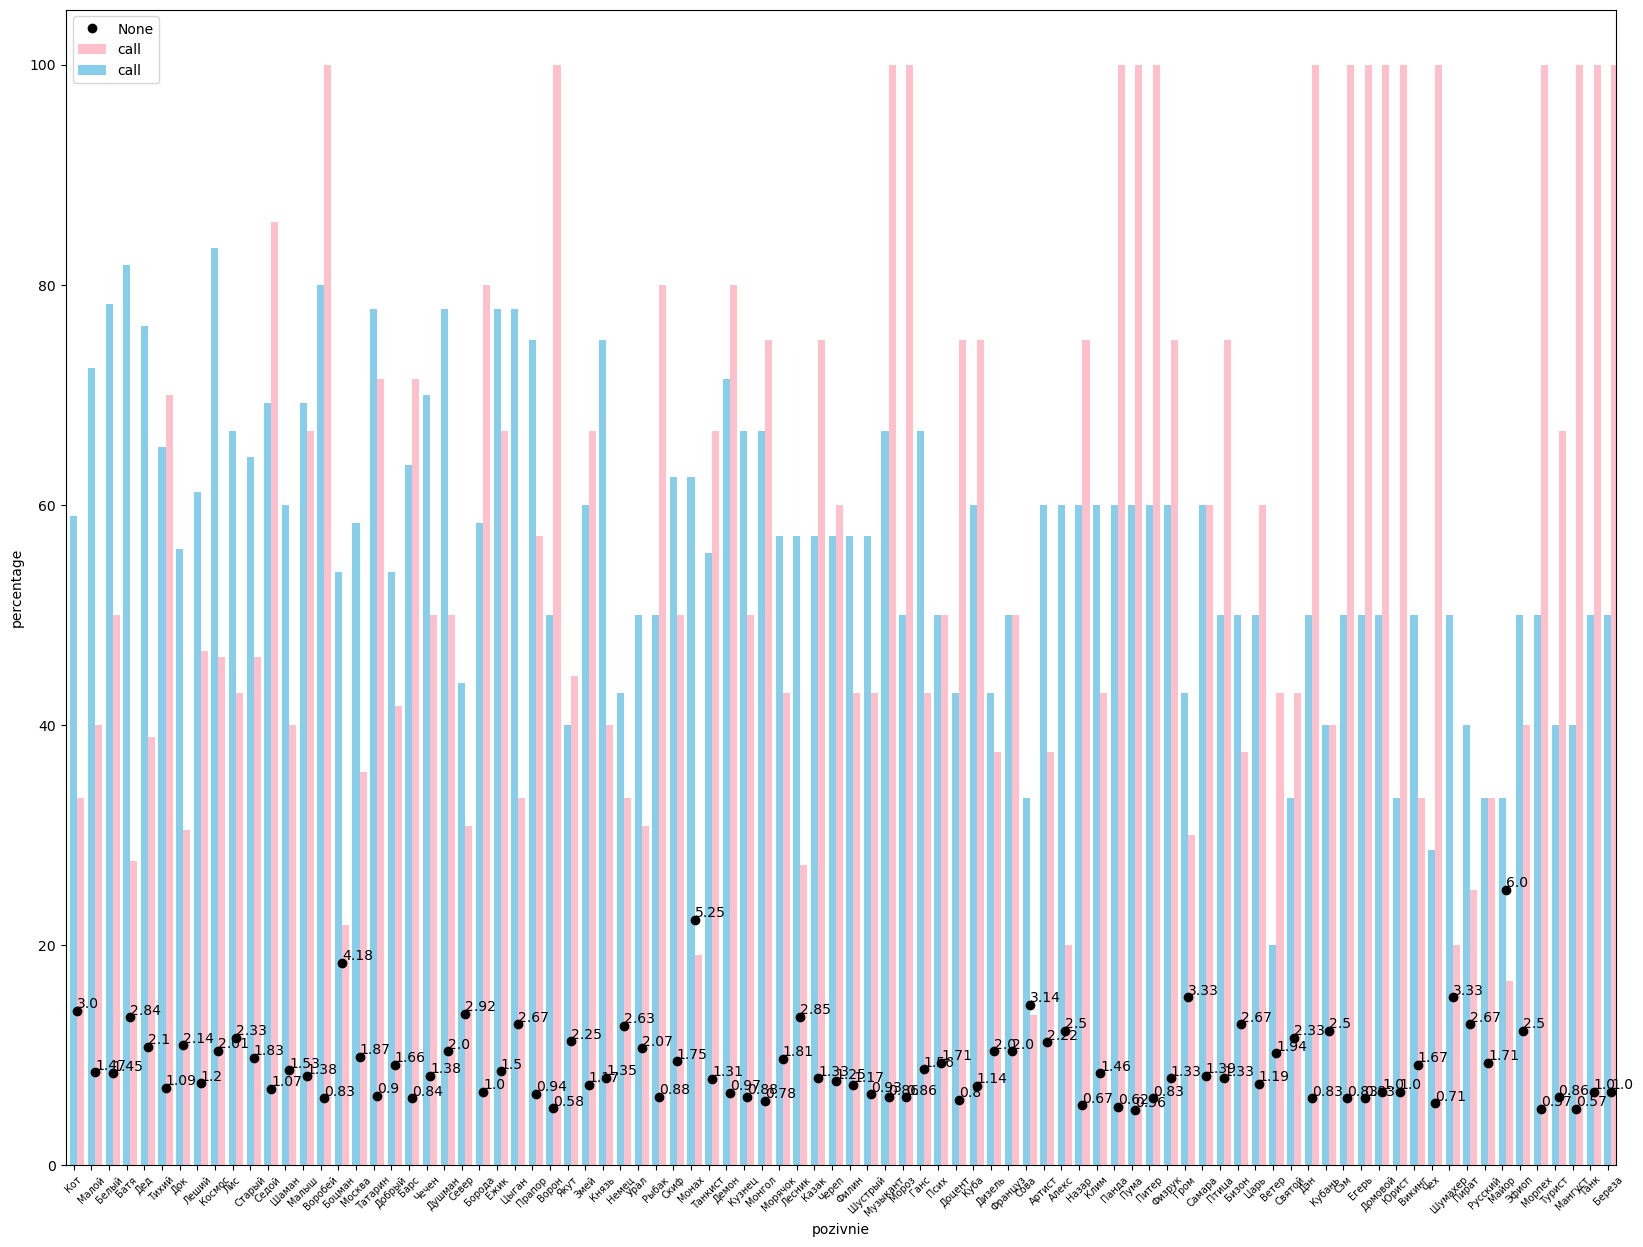

In [17]:
df2 = pd.DataFrame()



def getCallsByCitizenship(citizenship):
    df2 = df[df['call'].notnull()]
    df_by_country = df2[df2['citizenship'] == citizenship]

    calls_total = df2['call'].value_counts()

    calls = df_by_country["call"].value_counts()
    calls = calls[calls >= 2]


    for index, value in calls.items():
    #     # print(calls_total.iloc(index))
        calls[index] = (value / calls_total[index]) * 100

    return calls

 # Adjust width and height as needed

fig, ax = plt.subplots(figsize=(20, 15))

russia = getCallsByCitizenship('РФ')
ukraine = getCallsByCitizenship('Украина')
both_of  = ukraine[ukraine.index.isin(russia.index)]

bar_width = 0.4
margin = .2

x = range(len(both_of))
x2 = [pos + bar_width + margin for pos in x]

diff = []
for index in range(len(both_of)):
    # print(index)
    diff.append(ukraine[index] / russia[index])

diff_series_unnormalized = pd.Series(diff)
data_reshaped = diff_series_unnormalized.values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(5, 25))
scaled_data = scaler.fit_transform(data_reshaped)
diff_series = pd.Series(scaled_data.flatten())

# Plotting both Series on one plot
russia.plot(ax=ax, kind="bar", color="pink", width=bar_width, position=0)
both_of.plot(ax=ax, kind="bar", color="skyblue", width=bar_width, position=1)
diff_series.plot(ax=ax, color="black", kind='line',style='o')
for i, val in diff_series.items():
    ax.text(i, val, str(diff_series_unnormalized.round(decimals=2)[i]), ha='left', va='bottom')

ax.set_xticks([pos + bar_width / 2 - margin * 2 for pos in x])
ax.set_xticklabels(both_of.keys(), rotation=45, fontsize=7)  

plt.xlabel('pozivnie')
plt.ylabel('percentage')

# Adding labels, title, and legend
plt.legend()

# Displaying the plot
plt.show()



In [18]:
def count_substring_symbols(main_string, sub_string, min_sequence_length):
    count = 0
    str_length = len(main_string)

    for i in range(str_length - min_sequence_length + 1):
        substring = main_string[i:i + min_sequence_length]
        if substring in sub_string and len(substring) == min_sequence_length:
            count += 1

    return count

# Example strings
string1 = "llo"
string2 = "worldhello"
min_length = 1

# Calculate the number of symbols in string1 that are substrings of string2
result = count_substring_symbols(string2, string1,min_length)
print(f"Number of symbols in '{string1}' that are substrings of '{string2}' with at least {min_length} characters: {result}")


Number of symbols in 'llo' that are substrings of 'worldhello' with at least 1 characters: 5


In [19]:
def calculateCallMatch(reference, min_length):
    data = df[df['call'].notnull() & df[reference].notnull()]
    data["toponyms_similarity"] = 0

    for index, row in data.iterrows():
        data.loc[index, "toponyms_similarity"] = count_substring_symbols(row[reference], row["call"], 2)
        

    data = data[data["toponyms_similarity"] >= min_length]

    return data

def drawMatchedData(data):
    fig, ax = plt.subplots(figsize=(20, 15))
    x = range(len(data))

    ax.set_xticklabels(data["toponyms_similarity"], fontsize=10)  
    ax.set_xticks([pos for pos in x])

    data.plot(
        kind="bar",
        ax=ax,
        y="toponyms_similarity",
        x="call"
        )

    plt.show()    


/tmp/ipykernel_209985/3042725802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["toponyms_similarity"] = 0
/tmp/ipykernel_209985/3042725802.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data["toponyms_similarity"], fontsize=10)


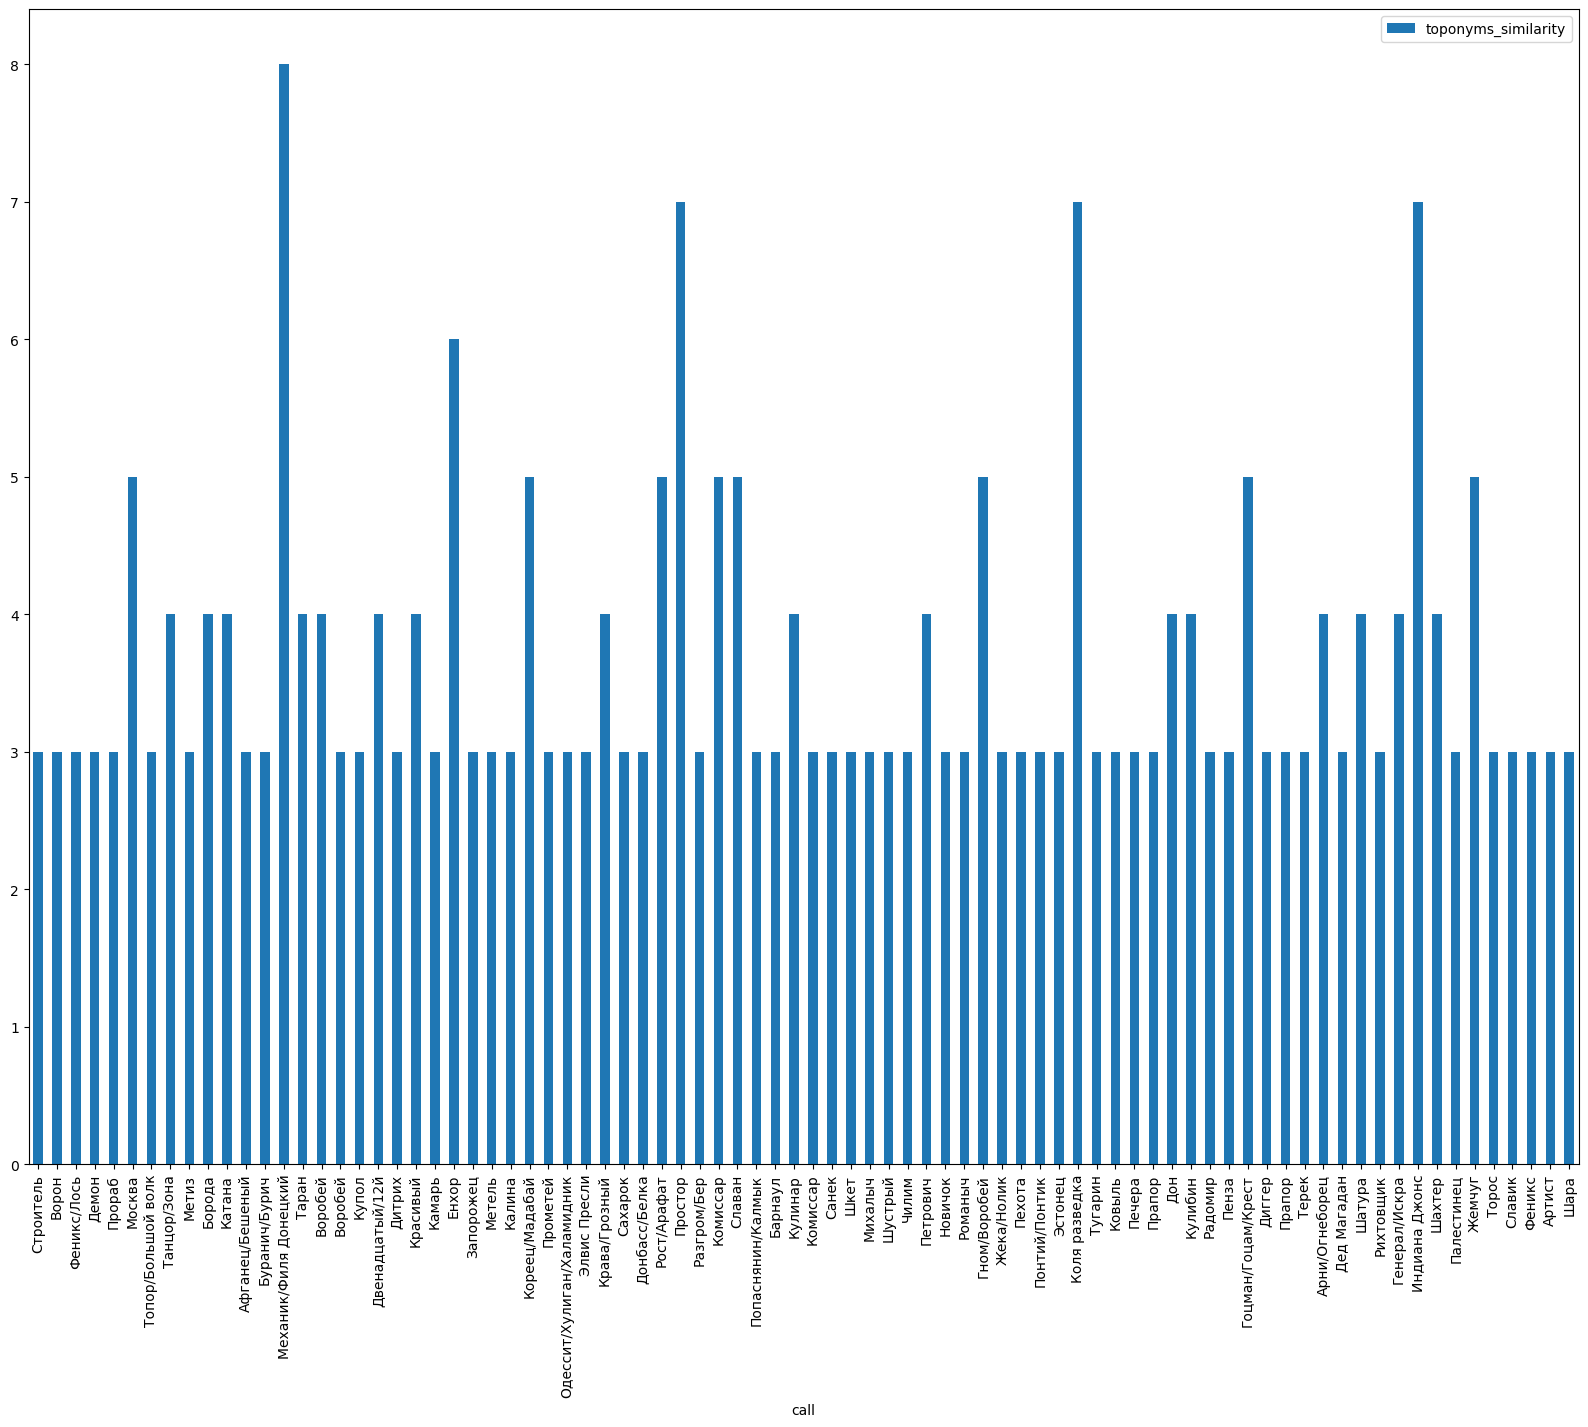

In [20]:
toponyms_search = calculateCallMatch("notes", 3)

drawMatchedData(toponyms_search)

In [21]:
personal_info_search = calculateCallMatch("name", 5)


/tmp/ipykernel_209985/3042725802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["toponyms_similarity"] = 0


In [27]:
personal_info_search_pretty = personal_info_search[["name", "call"]]

for i, row in personal_info_search_pretty.iterrows(): 
    name_splitted = row['name'].split()

    if len(name_splitted) >= 3:
        firstname = name_splitted[0]
        secondname = name_splitted[1]
        lastname = name_splitted[2]

        personal_info_search_pretty.loc[index, "lastname"] = lastname
        personal_info_search_pretty.loc[index, "firstname"] = firstname
        personal_info_search_pretty.loc[index, "secondname"] = secondname
    elif len(name_splitted) == 2:
        firstname = name_splitted[0]
        lastname = name_splitted[1]

        personal_info_search_pretty.loc[index, "lastname"] = lastname
        personal_info_search_pretty.loc[index, "firstname"] = firstname
        personal_info_search_pretty.loc[index, "secondname"] = None  # No second name available
    else:
        # Handle cases where the name cannot be split properly
        personal_info_search_pretty.loc[index, "lastname"] = None
        personal_info_search_pretty.loc[index, "firstname"] = None
        personal_info_search_pretty.loc[index, "secondname"] = None



personal_info_search_pretty

/tmp/ipykernel_209985/1315399513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal_info_search_pretty.loc[index, "lastname"] = str(lastname)


,name,call,lastname,firstname,secondname
256,Аксенов Вадим Александрович,Аксен,NaN,NaN,NaN
263,Аксенов Роман Александрович,Аксен,NaN,NaN,NaN
376,Алифанов Валерий Викторович,Алифан,NaN,NaN,NaN
470,Андросик Владимир Сергеевич,Андрос,NaN,NaN,NaN
543,Антропов Сергей Николаевич,Николаевич,NaN,NaN,NaN
546,Ануфриев Анатолий Владимирович,Ануфрий,NaN,NaN,NaN
713,Атаман Роман Дмитриевич,Атаман,NaN,NaN,NaN
929,Байков Андрей Васильевич,Васильич,NaN,NaN,NaN
938,Байрамов Руслан Байрамович,Байран/Руслан,NaN,NaN,NaN
964,Балабанов Виктор Владимирович,Балабас,NaN,NaN,NaN


In [23]:

toponyms_search_pretty = toponyms_search[["name", "call", "notes"]]

toponyms_search_pretty

,name,call,notes
75,Абросимов (Зорин) Александр Олегович,Строитель,"Широкино, попадание снаряда в автомобиль, вместе с Овчинников"
279,Алборов Олег Аланович,Ворон,"под обстрелом попал в ДТП вместе с Дудаев, похоронен 05/06/22 в Цхинвали"
327,Алексеенко Дмитрий Владимирович,Феникс/Лось,"Сокольники, вместе с ""Боксер"", ""Леон"""
450,Андреев Виталий Александрович,Демон,"сердце, похоронен на Донецком море"
581,Арапов Александр Александрович,Прораб,"Макеевка, Донецкая обл., удар по располаге в ПТУ №19, похоронен 25/02/23 в Новокуйбышевске"
603,Арзамасцев Николай Сергеевич,Москва,"Москва, болезнь"
663,Аруштов Олег Васильевич,Топор/Большой волк,"Орлово-Ивановка, р-н Могилы Острой, при штурме блокпоста, снайпер"
830,Бабич Александр Витальевич,Танцор/Зона,"Широкино, ранен 14/04/17, умер в больнице, похоронен на кладбище Овсяное в Снежное"
1460,Бигун Антон Валерьевич,Метиз,"17/11/14 ранен по неосторожности? Максимом Трофимовым ""Норманн"" из ГБР ""Бэтмен"" ""Ратибор"", умер в больнице"
1772,Боровиков Алексей Юрьевич,Борода,"Сватово Луганская обл. вместе с Абраменко, похоронен 09/02/23 в Туринская Слобода"
